# 2.11. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

아까 잠깐 다뤄보았던 손글씨 이미지를 제대로 0~9까지 열 가지 카테고리로 분류해 보는 실습을 해 보겠습니다.

## (1) 필요한 모듈 import하기

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


## (2) 데이터 준비

load_digits 메서드를 사용합니다.

In [15]:
from sklearn.datasets import load_digits

digits = load_digits()

digits.keys()
# digits 데이터에 어떤 정보들이 담겨 있는지 확인

digits_data = digits.data
print (digits_data.shape)

(1797, 64)


## (3) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

Feature Data 지정하기
Label Data 지정하기
Target Names 출력해 보기
데이터 Describe 해 보기

In [12]:
# Feature Data 지정하기
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [13]:
# label Data 지정하기
digits_label = digits.target
print (digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

In [14]:
# Target Names 출력
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Data Describe
print (digits.DESCR)

## (4) train, test 데이터 분리

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [73]:
# Pandas data 가져오기
import pandas as pd
print (pd.__version__)

digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df

# Label 칼럼 추가
digits_df["label"] = digits.target
digits_df

1.1.5


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [24]:
# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train.shape, y_train.shape

X_test.shape, y_test.shape

X_train 개수:  1437 , X_test 개수:  360


((360, 64), (360,))

In [27]:
y_train, y_test

(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

## (5) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

Decision Tree 사용해 보기
Random Forest 사용해 보기
SVM 사용해 보기
SGD Classifier 사용해 보기
Logistic Regression 사용해 보기

### 의사결정나무 사용

In [28]:
## 의사결정나무 가져오기
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [29]:
# Training set에 fitting하기
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [31]:
# 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [32]:
# accuracy 측정
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8555555555555555

In [55]:
# 손글씨 데이터 가져오기
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

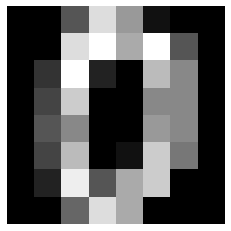

In [61]:
# 이미지 확인해보기
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

In [63]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [64]:
# New label로 다시 학습시키기
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

In [65]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

In [67]:
# 오차행렬 (confusion matrix) 가져오기
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

In [68]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]])

In [69]:
# Precision, Recall, f1 score 확인해보기
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [70]:
print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



/home/aiffel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# 정확도 측정하기
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

### Random Forest 사용

In [36]:
# Random Forest 가져오기
from sklearn.ensemble import RandomForestClassifier

In [37]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                    digits_label,
                                    test_size = 0.2,
                                    random_state = 32)

# 모델 학습 및 예측
random_forest = RandomForestClassifier(random_state = 32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      1.00      0.99        36
           2       0.97      1.00      0.98        32
           3       1.00      1.00      1.00        56
           4       1.00      0.97      0.98        31
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        34
           8       0.96      0.89      0.92        27
           9       0.97      1.00      0.99        36

    accuracy                           0.99       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.99      0.99      0.99       360



In [38]:
# accuracy 측정
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9861111111111112

### SVM 사용

In [39]:
# SVM 가져오기
from sklearn import svm
svm_model = svm.SVC()

In [45]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                    digits_label,
                                    test_size = 0.2,
                                    random_state = 32)
# 모델 학습 및 예측
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        56
           4       1.00      0.97      0.98        31
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        27
           9       0.95      1.00      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [46]:
# accuracy 측정
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9944444444444445

### SGD Classifier 사용

In [42]:
# SGD Classifier 가져오기
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

In [50]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                    digits_label,
                                    test_size = 0.2,
                                    random_state = 32)

# 모델 학습 및 예측
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      0.92      0.94        36
           2       1.00      1.00      1.00        32
           3       0.98      0.98      0.98        56
           4       1.00      1.00      1.00        31
           5       0.97      0.94      0.96        36
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       0.96      0.96      0.96        27
           9       0.90      1.00      0.95        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [44]:
# accuracy 측정
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

### Logistic Regression 사용

In [47]:
# Logistic Regression 가져오기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [53]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = trai_test_split(digits_data,
                                    digits_label,
                                    test_size = 0.2,
                                    random_state = 32)

# 모델 학습 및 예측
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.95      0.97      0.96        36
           2       1.00      0.97      0.98        32
           3       1.00      0.98      0.99        56
           4       1.00      0.97      0.98        31
           5       0.94      0.92      0.93        36
           6       1.00      1.00      1.00        34
           7       1.00      0.97      0.99        34
           8       0.96      1.00      0.98        27
           9       0.88      1.00      0.94        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



/home/aiffel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
# accuracy 측정
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9722222222222222

## (6) 모델을 평가해 보기

정확도 면을 따졌을때는 SVM이 가장 높게 나왔고 Decision Tree가 가장 낮게 나왔다.
그러나 MNIST를 가져오고 새로운 label로 다시 학습을 시키니 Decision Tree의 정확도가
상승한 것을 알 수 있었다. 

그러나 이러한 정확도만으로 성능을 평가하기엔 전체 데이터 중
맞은 데이터만 신경을 쓰기 때문에 다양한 평가 척도가 필요하다.
이러한 이유로 오차행렬을 도입해야 할 필요가 있다.

오차행렬은 아래와 같이 평가 결과를 네가지로 구분하기 때문에 어떤 데이터가 맞는지 틀리는지에
대해 더 정확히 평가를 할 수 있다.
-True positive
-False negative
-False positive
-True negative
